In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo Numérico - EP 3

## Funções

In [29]:
def simpson_integral(function, int_function, a, b, n):
    def f(x):
        return eval(function)
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
    exact_integral = (eval(int_function.replace('x', 'b')) - eval(int_function.replace('x', 'a')))
    error = np.abs(integral - exact_integral)
    return integral, error

def trapz_integral(function, a, b, n):
    def f(x):
        return eval(function)
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h * (np.sum(y[1:-1]) - (y[0] + y[-1]) / 2)
    return integral

def random(zi, a=1103515245, c=12345, m=2147483647):
    zi = (a * zi + c) % m
    return zi / m, zi

def MC_integral(function, a, b, n, zi):
    def f(x):
        return eval(function)
    n_in = 0
    x_values = np.linspace(a, b, n+1)
    height = max([f(x) for x in x_values])
    A = (b - a) * height
    for _ in range(n):
        rand_x, zi = random(zi)
        x = a + (b - a) * rand_x
        rand_y, zi = random(zi)
        y = height * rand_y
        if y < f(x):
            n_in += 1
    integral = A * n_in / n
    return integral

## Questão 1

### Item a)

In [5]:
data_simps = {'p': [], 'N': [], 'I_{\text{num}}': [], 'Erro': []}
for p in range(1,26):
    N = 2**p
    integral, error = simpson_integral('np.float32(6-6*x**5)', 'np.float32(6*x-x**6)', 0, 1, N)
    data_simps['p'].append(p)
    data_simps['N'].append(N)
    data_simps['I_{\text{num}}'].append(integral)
    data_simps['Erro'].append(error)
df_simps = pd.DataFrame(data=data_simps)
df_simps.to_csv('simpson_integral.csv', index=False)

### Item b)

In [6]:
data_simps_double = {'p': [], 'N': [], 'I_{\text{num}}': [], 'Erro': []}
for p in range(1, 26):
    N = 2**p
    integral, error = simpson_integral('np.float64(6-6*x**5)', 'np.float64(6*x-x**6)', 0, 1, N)
    data_simps_double['p'].append(p)    
    data_simps_double['N'].append(N)
    data_simps_double['I_{\text{num}}'].append(integral)
    data_simps_double['Erro'].append(error)
df_simps_double = pd.DataFrame(data=data_simps_double)
df_simps_double.to_csv('simpson_integral_double.csv', index=False)

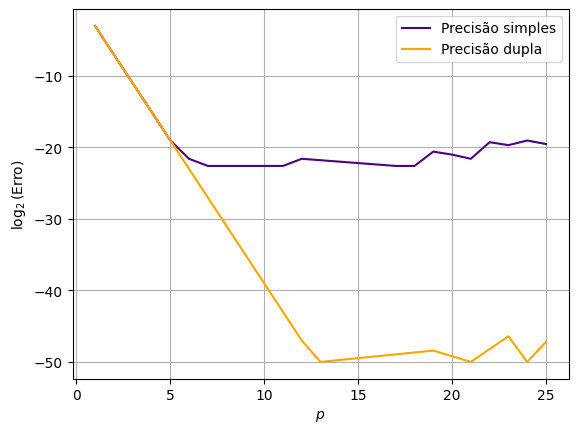

In [35]:
df_simps_nonzero = df_simps[df_simps['Erro'] != 0]
plt.plot(df_simps_nonzero['p'], np.log2(df_simps_nonzero['Erro']), c='indigo', label='Precisão simples')
df_simps_double_nonzero = df_simps_double[df_simps_double['Erro'] != 0]
plt.plot(df_simps_double_nonzero['p'], np.log2(df_simps_double_nonzero['Erro']), c='orange', label='Precisão dupla')
plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'$\log_2$(Erro)')
plt.grid()
plt.savefig('simpson_integral.png', dpi=240)
plt.show()

## Questão 2

In [37]:
l = 1 # metros
g = 9.807 # m/s^2
theta_0 = np.linspace(0, np.pi, 10)
k = (1 - np.cos(theta_0)) / 2
T_gal = 2*np.pi*np.sqrt(l/g)
N = 1000
data_trapz = {'\theta_0':[], 'T/T_{\text{gal}}': []}
for i in range(len(theta_0)):
    integral = trapz_integral('1/np.sqrt(1-(k[i]*np.sin(x))**2)', 0, np.pi/2, N)
    T = 4*np.sqrt(l/g)*integral
    data_trapz['\theta_0'].append(theta_0[i])
    data_trapz['T/T_{\text{gal}}'].append(T / T_gal)

df_trapz = pd.DataFrame(data=data_trapz)
df_trapz.to_csv('trapz_integral_10.csv', index=False)

<string>:1: RuntimeWarning: divide by zero encountered in divide


In [8]:
l = 1 # metros
g = 9.807 # m/s^2
theta_0 = np.linspace(0, np.pi, 1000)
k = (1 - np.cos(theta_0)) / 2
T_gal = 2*np.pi*np.sqrt(l/g)
N = 1000
data_trapz = {'\theta_0':[], 'T/T_{\text{gal}}': []}
for i in range(len(theta_0)):
    integral = trapz_integral('1/np.sqrt(1-(k[i]*np.sin(x))**2)', 0, np.pi/2, N)
    T = 4*np.sqrt(l/g)*integral
    data_trapz['\theta_0'].append(theta_0[i])
    data_trapz['T/T_{\text{gal}}'].append(T / T_gal)

df_trapz = pd.DataFrame(data=data_trapz)
df_trapz.to_csv('trapz_integral.csv', index=False)

<string>:1: RuntimeWarning: divide by zero encountered in divide


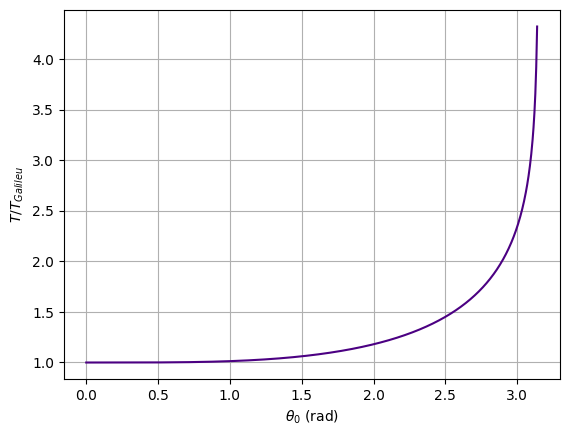

In [36]:
plt.plot(df_trapz['\theta_0'], df_trapz['T/T_{\text{gal}}'], color='indigo')
plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel(r'$T/T_{Galileu}$')
plt.grid()
plt.savefig('trapz_integral.png', dpi=240)
plt.show()

## Questão 3

### Item a)

In [13]:
print(random(12610413)[0])

0.4246220939907348


### Item b)

In [30]:
print(MC_integral('1-x**2', 0, 1, 100, 12610413))

0.65


## Item c)

In [31]:
I = []
seed = 12610413
MC_data = {'N_t': [], 'I_m':[], 'sigma': [], 'sigma_m': []}
for p in range(1, 18):
    N_t = 2**p
    seeds = np.zeros(N_t)
    for n in range(N_t):
        _, seed = random(seed)
        seeds[n] = seed
    I = np.array([MC_integral('1-x**2', 0, 1, 100, s) for s in seeds])
    I_m = np.sum(I) / N_t
    sigma = np.sqrt(np.sum((I - I_m)**2) / (N_t - 1))
    sigma_m = sigma / np.sqrt(N_t)
    MC_data['N_t'].append(N_t)
    MC_data['I_m'].append(I_m)
    MC_data['sigma'].append(sigma)
    MC_data['sigma_m'].append(sigma_m)
df_MC = pd.DataFrame(data=MC_data)
df_MC.to_csv('MC_integral.csv', index=False)

In [32]:
df_MC

,N_t,I_m,sigma,sigma_m
0,2,0.650000,0.014142,0.010000
1,4,0.687500,0.055603,0.027801
2,8,0.660000,0.035051,0.012392
3,16,0.662500,0.045387,0.011347
4,32,0.665625,0.043769,0.007737
5,64,0.661563,0.047249,0.005906
6,128,0.670078,0.044536,0.003936
7,256,0.667773,0.048694,0.003043
8,512,0.665645,0.048379,0.002138
9,1024,0.667080,0.045563,0.001424
